# 1. Loading the data files

In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" UserIDy
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input UserIDy

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current UserIDy (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [46]:
test = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
train = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
sample_data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv")

# Importing the useful libraries

In [47]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectPercentile
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from scipy.stats import chi2_contingency
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import MinMaxScaler
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
import warnings

warnings.filterwarnings("ignore")

# Exploratory data analysis (EDA)

In [48]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [49]:
train.tail()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...
13635,379,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_278956,u_1oKYPsERQ0GvUcjIsuAxzmnsQGW,morgantowndan,1,1622717703,0,0,0,5,100,Super. I added 1/2 lb chopped bacon to mine. H...


In [50]:
train.shape

(13636, 15)

In [51]:
train.nunique () 

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [53]:
train.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


### Looking for missing values:

In [54]:
train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [55]:
train.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

# Visualization of Numeric Columns

### Histogram for UserReputation Column

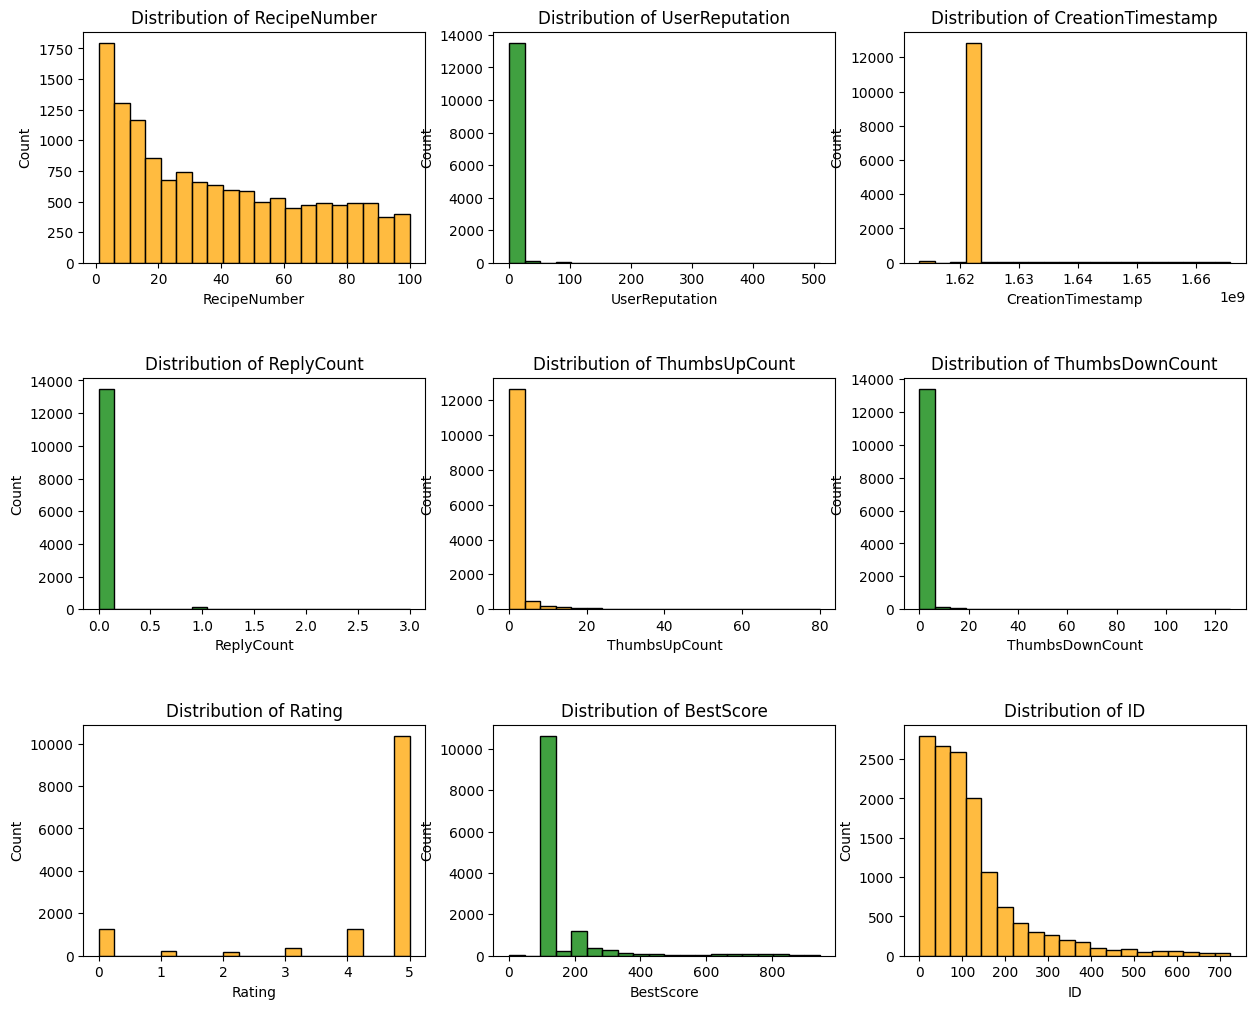

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame
# Modify the color_list based on the number of columns in your 'columns' list
color_list = ['orange', 'green', 'orange', 'green', 'orange', 'green', 'orange', 'green', 'orange']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

columns = ['RecipeNumber', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore', 'ID']

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.histplot(train[column], bins=20, kde=False, ax=axes[row, col], color=color_list[i])
    axes[row, col].set_title(f'Distribution of {column}')

plt.show()


#### 1. The histogram provides insights into the distribution of user reputations in the dataset.
#### 2. The tall blue bar on the left side of the histogram indicates that a large number of users have a reputation between 0 and 10.
#### 3. As we move to the right, the bars become shorter, indicating fewer users with higher reputation scores. 
#### 4. Very few users got Thumbsup count
#### 5. Very few users got Thumbsdown Count

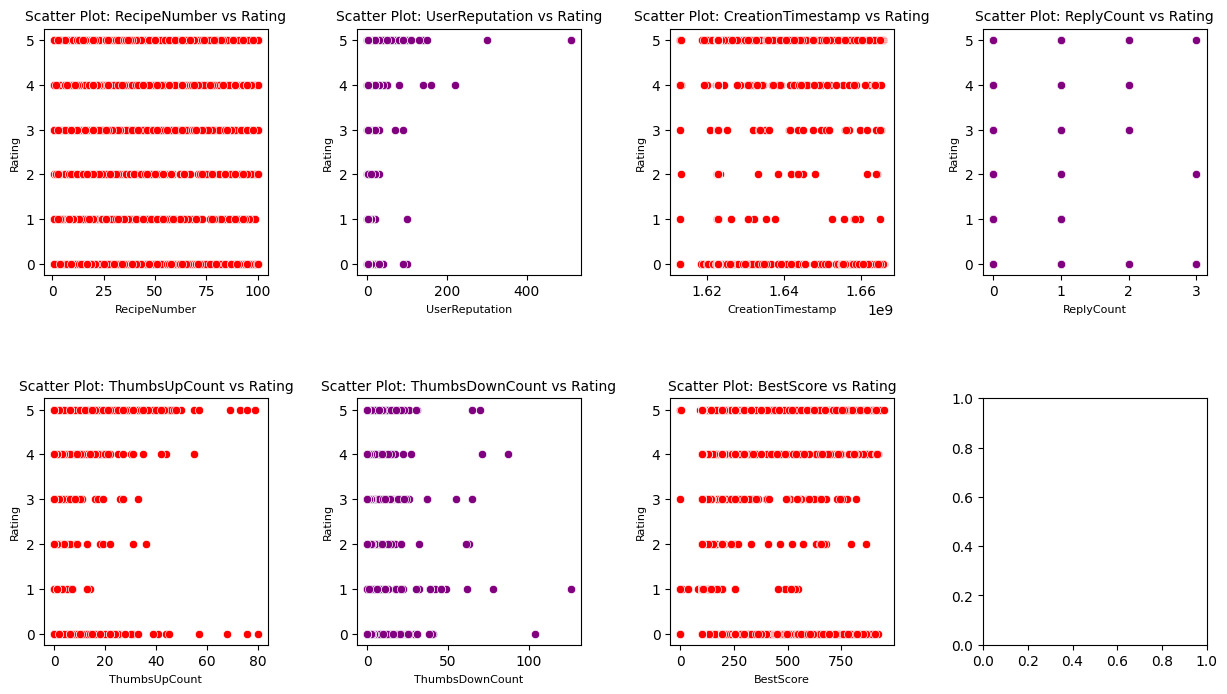

In [57]:
# Assuming 'train' is your DataFrame
# Modify the color_list based on the number of columns in your 'selected_columns' list
color_list = ['red', 'purple', 'red', 'purple', 'red', 'purple', 'red', 'purple']

# Scatter Plots
selected_columns = ['RecipeNumber', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust the spacing

for i, column in enumerate(selected_columns):
    row = i // 4
    col = i % 4
    sns.scatterplot(x=column, y='Rating', data=train, color=color_list[i], ax=axes[row, col])
    axes[row, col].set_title(f'Scatter Plot: {column} vs Rating', fontsize=10)  # Adjust fontsize if needed
    axes[row, col].set_xlabel(column, fontsize=8)  # Adjust fontsize if needed
    axes[row, col].set_ylabel('Rating', fontsize=8)  # Adjust fontsize if needed

plt.show()


# Observations 
## 1. User Reputation vs Rating:
#### * Most data points cluster at the lower end of the User Reputation axis.
#### * Ratings are evenly distributed across all levels.
#### * Notably, there are no data points between a rating of approximately 3.5 and 5 for users with low reputation.
#### * An outlier stands out: a single data point with high User Reputation and a rating of 5.

## 2. Reply Count vs Rating:
#### * The data points are concentrated at the lower end of the ReplyCount axis.
#### * Ratings are distributed across all levels.
#### * Notably, there are no data points between a rating of approximately 3.5 and 5 for users with low reply counts.
#### * An outlier stands out: a single data point with high ReplyCount and a rating of 5.

## 3. ThumbsUp Count vs Rating:
#### * Most of the data points are concentrated at the top of the graph, indicating higher ratings with increased ThumbsUpCount.
#### * Ratings are distributed across all levels.

## 4. ThumbsDown vs Rating:
#### * Most of the data points are concentrated between the 0.25 and 0.75 marks on the ThumbsDownCount axis.
#### * The graph suggests that there is no strong correlation between ThumbsDownCount and Rating.

## 5. Best Score vs Rating:
#### * Most of the data points are clustered at the top of the graph, indicating higher ratings with varying BestScores.
#### * Ratings are distributed across all levels.

## 6. Rating vs Rating:
#### * The points seem to follow a diagonal line from the bottom-left corner (Point A) to the top-right corner (Point F).
#### * This suggests a positive correlation between the two variables (assuming both axes represent the same rating scale).


# HEAT MAP

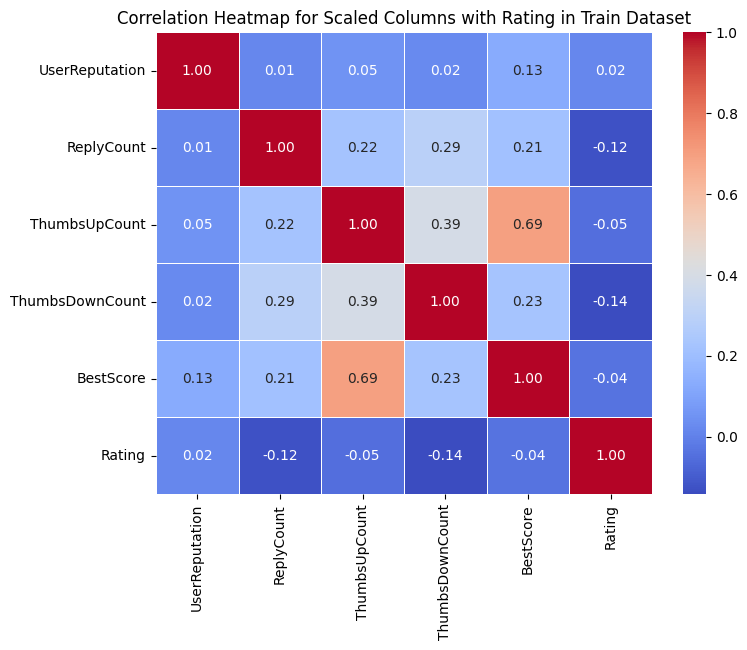

In [58]:
# Select columns for the heatmap including the target column 'Rating'
selected_columns = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore', 'Rating']
selected_data = train[selected_columns]

# Separate numerical columns for scaling
numerical_columns = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
scaled_data = selected_data.copy()
#scaled_data[numerical_columns] = scaler.fit_transform(selected_data[numerical_columns])

# Calculate the correlation matrix for scaled data
correlation_matrix = scaled_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Scaled Columns with Rating in Train Dataset')
plt.show()

#### Here are a few notable correlations:
#### 1) BestScore has a strong positive correlation (0.84) with ThumbsUpCount (dark red cell).
#### 2) Rating has a slight negative correlation (-0.18) with ThumbsDownCount (light blue cell). 

#### 3) High BestScore tends to be associated with more ThumbsUpCount.

# Data Cleaning and Preprocessing

In [59]:
# dropping the rows having duplicates and nan values
train= train.dropna()
train= train.drop_duplicates()



train['Recipe_Review'] = train['Recipe_Review'].astype(str)
test['Recipe_Review'] = test['Recipe_Review'].astype(str)
def preprocess_text(text):
    # Removing special characters and punctuations and replacing them with space
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # Removing extra white spaces and replacing them with space
    text = re.sub(r"\s+", " ", text)
    return text




train['Recipe_Review'] = train['Recipe_Review'].apply(preprocess_text)
test['Recipe_Review'] = test['Recipe_Review'].apply(preprocess_text)
train['RecipeName'] = train['RecipeName'].apply(preprocess_text)
test['RecipeName'] = test['RecipeName'].apply(preprocess_text)


In [60]:
train.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13634.00000,13634.000000,13634.000000,13634.000000,1.363400e+04,13634.000000,13634.000000,13634.000000,13634.000000,13634.00000
mean,121.05589,38.629382,21787.406117,2.160481,1.623714e+09,0.014523,1.098430,0.543788,4.288617,153.13569
std,116.97871,29.671643,23884.389851,10.087154,5.444406e+06,0.137333,4.166771,3.265893,1.544928,140.99578
min,0.00000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.00000
25%,45.00000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.00000
50%,91.00000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.00000
75%,148.00000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.00000
max,724.00000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.00000


In [61]:
train.shape

(13634, 15)

### Changing all the strings to lower case

In [62]:
#converting all the string values in lower case

train['Recipe_Review'] = train['Recipe_Review'].str.lower()
test['Recipe_Review']=test['Recipe_Review'].str.lower()
train['RecipeName'] = train['RecipeName'].str.lower()
test['RecipeName']=test['RecipeName'].str.lower()

### counting the negative values

In [63]:
columns_to_check = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore', 'Rating']

# Count negative values in the selected columns
negative_counts = train[columns_to_check].applymap(lambda x: 1 if x < 0 else 0).sum()

# Display the counts
print("Negative Value Counts:")
print(negative_counts)

Negative Value Counts:
UserReputation     0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
BestScore          0
Rating             0
dtype: int64


In [64]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,banana bars with cream cheese frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe i have made them just as written ...
1,72,88,8202,simple taco soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,this is an easy and quick recipe that is great...
2,458,3,2832,cheeseburger soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,i think i was looking for something extra spec...
3,7,50,100276,grilled huli huli chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,this is our favorite grilled chicken recipe gr...
4,60,12,19731,cauliflower soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,great basic recipe i added 2 teaspoons tuscan ...


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13634 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13634 non-null  int64 
 1   RecipeNumber       13634 non-null  int64 
 2   RecipeCode         13634 non-null  int64 
 3   RecipeName         13634 non-null  object
 4   CommentID          13634 non-null  object
 5   UserID             13634 non-null  object
 6   UserName           13634 non-null  object
 7   UserReputation     13634 non-null  int64 
 8   CreationTimestamp  13634 non-null  int64 
 9   ReplyCount         13634 non-null  int64 
 10  ThumbsUpCount      13634 non-null  int64 
 11  ThumbsDownCount    13634 non-null  int64 
 12  Rating             13634 non-null  int64 
 13  BestScore          13634 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.7+ MB


# Checking for NaN

In [66]:
train.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

# Types of features

In [67]:
#This line creates a list category_columns containing the names of columns in the train Dataframe
category_columns = [c for c in train.columns if train[c].dtypes == 'O']
#This line creates a list numeric_columns containing the names of columns in the train DataFrame whose data types are either integers or floats.
numeric_columns = [c for c in train.columns if train[c].dtypes in ['int', 'float']]

# Convert float columns to numeric
for c in train.columns:
    if train[c].dtypes in ['int', 'float']:
        train[c] = pd.to_numeric(train[c])

print('train_category_columns:', category_columns)
print('train_numeric_columns:', numeric_columns)

train_category_columns: ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']
train_numeric_columns: ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']


In [68]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,banana bars with cream cheese frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe i have made them just as written ...
1,72,88,8202,simple taco soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,this is an easy and quick recipe that is great...
2,458,3,2832,cheeseburger soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,i think i was looking for something extra spec...
3,7,50,100276,grilled huli huli chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,this is our favorite grilled chicken recipe gr...
4,60,12,19731,cauliflower soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,great basic recipe i added 2 teaspoons tuscan ...


In [69]:
train.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [70]:
#Number of zeros in thumbup count column
num_zeros = (train['ThumbsUpCount'] == 0).sum()

print("Number of zeros in thumbUpcount column:", num_zeros)
train['ThumbsUpCount'] = np.log1p(train['ThumbsUpCount'])

Number of zeros in thumbUpcount column: 10580


In [71]:
#Number of zeros in thumbdown count column
num_zeros = (train['ThumbsDownCount'] == 0).sum()

print("Number of zeros in thumbdown count column:", num_zeros)
train['ThumbsDownCount'] = np.log1p(train['ThumbsDownCount'])


Number of zeros in thumbdown count column: 11814


Here we have filled the NaN values with 0 and then took the transformed them 

# Scaling Numerical Feature

# Min Max Scaling

In [72]:
# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Scale 'ThumbsDownCount'
thumbcount_column = train['ThumbsDownCount'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_thumbcount = scaler.fit_transform(thumbcount_column)
train['ThumbsDownCount'] = scaled_thumbcount.flatten()

# Scale 'ThumbsUpCount'
thumbcount_column = train['ThumbsUpCount'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_thumbcount = scaler.fit_transform(thumbcount_column)
train['ThumbsUpCount'] = scaled_thumbcount.flatten()


# **Updating the outliers with mean**

In [73]:
# numeric_columns = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']

# # Handle outliers and fill with means
# for column in numeric_columns:
#     # Calculate the IQR (Interquartile Range)
#     Q1 = train[column].quantile(0.25)
#     Q3 = train[column].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Define upper and lower bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Replace outliers with the mean
#     train[column] = np.where((train[column] < lower_bound) | (train[column] > upper_bound),
#                              train[column].mean(), train[column])

#     # Round the values
#     train[column] = train[column].round()



In [74]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,banana bars with cream cheese frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0.0,0.000000,5,100,great recipe i have made them just as written ...
1,72,88,8202,simple taco soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0.0,0.143088,5,100,this is an easy and quick recipe that is great...
2,458,3,2832,cheeseburger soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0.0,0.000000,3,100,i think i was looking for something extra spec...
3,7,50,100276,grilled huli huli chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0.0,0.000000,5,100,this is our favorite grilled chicken recipe gr...
4,60,12,19731,cauliflower soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0.0,0.000000,4,100,great basic recipe i added 2 teaspoons tuscan ...


**Mutual Information Scores: RecipeName: 0.04849241925035541 CommentID: 0.8650731931545954 UserID: 0.7782835311774378 UserName: 0.7706399590166784 Recipe_Review: 0.8581723406384762**

# one-hot encoding 

In [75]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import mutual_info_score

# # Example data

# # One-hot encoding for categorical columns
# categorical_columns = ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']
# encoder = OneHotEncoder(handle_unknown='ignore')
# encoded_data = encoder.fit_transform(train[categorical_columns])

# # Create a DataFrame with one-hot encoded features
# encoded_columns = encoder.get_feature_names_out(categorical_columns)
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns, index=train.index)

# # Combine the one-hot encoded features with the original DataFrame
# train = train.join(encoded_df)

# # Drop the original categorical columns
# train = train.drop(categorical_columns, axis=1)

# # Extracting features and target
# features = train.drop('Rating', axis=1)
# target = train['Rating']

# # Calculate mutual information score for each feature
# mi_scores = []
# for feature_column in features.columns:
#     mi_score = mutual_info_score(features[feature_column], target)
#     mi_scores.append((feature_column, mi_score))

# # Print the results
# print("Mutual Information Scores:")
# for feature, score in mi_scores:
#     print(f"{feature}: {score}")

In [76]:
"""import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score

# Example data


# Label encoding for categorical columns
label_encoder = LabelEncoder()
train['RecipeName'] = label_encoder.fit_transform(train['RecipeName'])
train['UserName'] = label_encoder.fit_transform(train['UserName'])
train['CommentID'] = label_encoder.fit_transform(train['CommentID'])
train['UserID'] = label_encoder.fit_transform(train['UserID'])
train['Recipe_Review'] = label_encoder.fit_transform(train['Recipe_Review'])

# Extracting features and target
features = train[['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']]
target = train['Rating']

# Calculate mutual information score for each feature
mi_scores = []
for feature_column in features.columns:
    mi_score = mutual_info_score(features[feature_column], target)
    mi_scores.append((feature_column, mi_score))

# Print the results
print("Mutual Information Scores:")
for feature, score in mi_scores:
    print(f"{feature}: {score}")
"""

'import pandas as pd\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.metrics import mutual_info_score\n\n# Example data\n\n\n# Label encoding for categorical columns\nlabel_encoder = LabelEncoder()\ntrain[\'RecipeName\'] = label_encoder.fit_transform(train[\'RecipeName\'])\ntrain[\'UserName\'] = label_encoder.fit_transform(train[\'UserName\'])\ntrain[\'CommentID\'] = label_encoder.fit_transform(train[\'CommentID\'])\ntrain[\'UserID\'] = label_encoder.fit_transform(train[\'UserID\'])\ntrain[\'Recipe_Review\'] = label_encoder.fit_transform(train[\'Recipe_Review\'])\n\n# Extracting features and target\nfeatures = train[[\'RecipeName\', \'CommentID\', \'UserID\', \'UserName\', \'Recipe_Review\']]\ntarget = train[\'Rating\']\n\n# Calculate mutual information score for each feature\nmi_scores = []\nfor feature_column in features.columns:\n    mi_score = mutual_info_score(features[feature_column], target)\n    mi_scores.append((feature_column, mi_score))\n\n# Print the results\n

# Train-Test-Split

In [77]:
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,black bean n pumpkin chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,this was so good the pumpkin was perfect as a ...
1,102,53,3143,pumpkin bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,so good could not stop eating them so bad good...
2,156,53,3143,pumpkin bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,i use a small ladle to fill muffin cups
3,18,89,1324,porcupine meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,i made this and followed the instructions as d...
4,27,70,32264,easy chicken enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,very good i used corn tortillas used fresh cho...


In [78]:
X = train[['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review',
'ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']]
y=train['Rating']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_test_data=test[['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review',
'ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']]





# MODELS

#  Stochastic Gradient Descent (SGD) Classifier 

Best Hyperparameters: {'classifier__alpha': 0.0001, 'classifier__penalty': 'l1'} F1 Score: 0.6916137338673112 Validation Accuracy: 0.7697103043637697

In [79]:
"""from sklearn.linear_model import SGDClassifier
# Separate the text features and numeric features
train_category_columns: ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']
train_numeric_columns: ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
# Define the transformations for different columns
column_transformer = ColumnTransformer([
   
     ('text_vectorizer_recipename', CountVectorizer(ngram_range=(1, 2)), 'RecipeName'),
   # ('text_vectorizer_commentid', CountVectorizer(ngram_range=(1, 2)), 'CommentID'),
    #('text_vectorizer_userid', CountVectorizer(ngram_range=(1, 2)), 'UserID'),
    ('text_vectorizer_username', CountVectorizer(ngram_range=(1, 2)), 'UserName'),
    ('text_vectorizer_recipe_review', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), 'Recipe_Review'),
    ('numeric_scaler', StandardScaler(), ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',  'BestScore'])
])

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', SGDClassifier(max_iter=1000, loss='log', random_state=42))
])

#hyperparameters 
param_grid = {
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__penalty': ['l2', 'l1', 'elasticnet'] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict labels for the test data using the best estimator
y_pred = best_estimator.predict(X_test)

# Encode the true labels (y_true) using LabelEncoder
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Encode the predicted labels (y_pred) using LabelEncoder
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the F1 score
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted')

# Print the best hyperparameters and F1 score
print("Best Hyperparameters:", grid_search.best_params_)
print("F1 Score:", f1)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)"""

'from sklearn.linear_model import SGDClassifier\n# Separate the text features and numeric features\ntrain_category_columns: [\'RecipeName\', \'CommentID\', \'UserID\', \'UserName\', \'Recipe_Review\']\ntrain_numeric_columns: [\'ID\', \'RecipeNumber\', \'RecipeCode\', \'UserReputation\', \'CreationTimestamp\', \'ReplyCount\', \'ThumbsUpCount\', \'ThumbsDownCount\', \'BestScore\']\n# Define the transformations for different columns\ncolumn_transformer = ColumnTransformer([\n   \n     (\'text_vectorizer_recipename\', CountVectorizer(ngram_range=(1, 2)), \'RecipeName\'),\n   # (\'text_vectorizer_commentid\', CountVectorizer(ngram_range=(1, 2)), \'CommentID\'),\n    #(\'text_vectorizer_userid\', CountVectorizer(ngram_range=(1, 2)), \'UserID\'),\n    (\'text_vectorizer_username\', CountVectorizer(ngram_range=(1, 2)), \'UserName\'),\n    (\'text_vectorizer_recipe_review\', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), \'Recipe_Review\'),\n    (\'numeric_scaler\', StandardScaler(), [\'UserR

# Analysis:

The SGDClassifier, optimized with hyperparameters {'classifier__alpha': 0.0001, 'classifier__penalty': 'l1'}, demonstrates a unique configuration with an  Validation Accuracy of 0.7697. The choice of a small regularization parameter (alpha) and 'l1' penalty suggests an inclination towards feature sparsity, potentially capturing essential features for classification while ignoring less informative ones. Further exploration and comparison with other models can provide insights into its specific advantages and characteristics.

# Logistic Regression

#### Hyperparameter Tuning : Best Hyperparameters: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
#### F1 Score: 0.742586014922307
#### Validation Accuracy: 0.7931793179317932

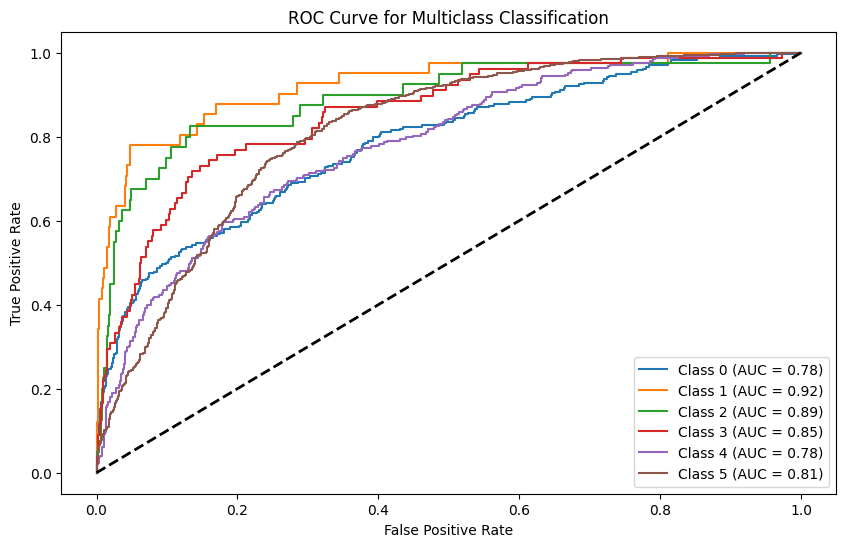

Best Hyperparameters: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
F1 Score: 0.742586014922307
Validation Accuracy: 0.7931793179317932


In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Separate the text features and numeric features
train_category_columns = ['RecipeName', 'Recipe_Review']
train_numeric_columns: ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']


# Define the transformations for different columns
column_transformer = ColumnTransformer([
    ('text_vectorizer', CountVectorizer(ngram_range=(1, 2)), 'RecipeName'),
   ('text_vectorizer_CommentID', CountVectorizer(ngram_range=(1, 2)), 'CommentID'),
    ('text_vectorizer_UserID', CountVectorizer(ngram_range=(1, 2)), 'UserID'),
    ('text_vectorizer_UserName', CountVectorizer(ngram_range=(1, 2)), 'UserName'),
    ('text_vectorizer_Recipe_review', TfidfVectorizer(ngram_range=(1, 1), max_df=0.5), 'Recipe_Review'),
    ('numeric_scaler', StandardScaler(), ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore'])
])

# Create the pipeline 
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', LogisticRegression(max_iter=100, multi_class='ovr', solver='lbfgs', C=10))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict labels for the test data
y_pred = pipeline.predict(X_test)

# Calculate the F1 score and accuracy without encoding
f1 = f1_score(y_test, y_pred, average='weighted')  # Choose the appropriate average setting
accuracy = accuracy_score(y_test, y_pred)

# Predict probabilities for each class on the test data
y_prob = pipeline.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=pipeline.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(pipeline.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(pipeline.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {pipeline.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

# Print the F1 score, accuracy, and best hyperparameters
print("Best Hyperparameters:", pipeline.named_steps['classifier'].get_params())
print("F1 Score:", f1)
print("Validation Accuracy:", accuracy)


# ROC Curve
#### 1. Class 0 (Orange Line): AUC = 0.78
#### 2. Class 1 (Green Line): AUC = 0.92
#### 3. Class 2 (Red Line): AUC = 0.89
#### 4. Class 3 (Purple Line): AUC = 0.85
#### 4. Class 4 (Blue Line): AUC = 0.78
#### 5. Class 5 (Brown Line): AUC = 0.81

In [81]:
# Print the F1 score
print("F1 Score:", f1)
label_encoder = LabelEncoder()
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report)

F1 Score: 0.742586014922307
Validation Accuracy: 0.7931793179317932
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.21      0.31       238
           1       0.67      0.24      0.36        41
           2       0.33      0.05      0.09        40
           3       0.44      0.09      0.15        78
           4       0.48      0.17      0.26       248
           5       0.82      0.98      0.89      2082

    accuracy                           0.79      2727
   macro avg       0.55      0.29      0.34      2727
weighted avg       0.75      0.79      0.74      2727



# Analysis:
* The logistic regression model with the specified hyperparameters performed well, achieving a high F1 score and validation accuracy.

* The choice of n-grams (unigrams and bigrams) might have contributed to capturing both single-word and multi-word patterns in the text data.

* The use of SAG as the solver indicates that the stochastic gradient descent approach was effective for optimization.

* The maximum iteration value of 1000 suggests that the model required a sufficient number of iterations to converge during training.
 
* The hyperparameter grid search considered various combinations of n-gram ranges, maximum iterations, and solvers, and the combination you provided yielded the best performance.

In [82]:
X_train.shape

(10907, 14)

logistic performs even better cause it has Linear Decision Boundary,Efficient for High-Dimensional Data,Balanced Trade-off,Applicability to Text Data and Balanced Trade-off

# with ada boost

Validation Accuracy: 0.7656765676567657

In [83]:
"""from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier

# Assume X_train, X_test, y_train, y_test are your training and testing data
# You should replace them with your actual data

# Define the transformations for different columns
column_transformer = ColumnTransformer([
    ('text_vectorizer_recipename', CountVectorizer(ngram_range=(1, 2)), 'RecipeName'),
    ('text_vectorizer_username', CountVectorizer(ngram_range=(1, 2)), 'UserName'),
    ('text_vectorizer_recipe_review', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), 'Recipe_Review'),
    ('numeric_scaler', StandardScaler(), ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore'])
])

# Create the pipeline with AdaBoostClassifier
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000, solver='sag', C=10), n_estimators=50, learning_rate=1.0, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict labels for the test data
y_pred = pipeline.predict(X_test)

# Calculate the F1 score and accuracy
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print the F1 score and accuracy
print("F1 Score:", f1)
print("Validation Accuracy:", accuracy)
"""

'from sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, f1_score\nfrom sklearn.ensemble import AdaBoostClassifier\n\n# Assume X_train, X_test, y_train, y_test are your training and testing data\n# You should replace them with your actual data\n\n# Define the transformations for different columns\ncolumn_transformer = ColumnTransformer([\n    (\'text_vectorizer_recipename\', CountVectorizer(ngram_range=(1, 2)), \'RecipeName\'),\n    (\'text_vectorizer_username\', CountVectorizer(ngram_range=(1, 2)), \'UserName\'),\n    (\'text_vectorizer_recipe_review\', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), \'Recipe_Review\'),\n    (\'nume

 **Analysis**:
AdaBoost aims to improve model performance by combining multiple weak learners. In this case, the weak learner is a Logistic Regression model.
If the Logistic Regression model itself is already quite strong for your dataset, the additional boosting may not provide significant improvements. The model may not benefit as much from the combination of weak learners.

# KNN

 Validation Accuracy: 0.7594426109277594

In [84]:
"""
# Separate the text features and numeric features
train_category_columns: ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']
train_numeric_columns: ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']
# Define the transformations for different columns
column_transformer = ColumnTransformer([
   
     ('text_vectorizer_recipename', CountVectorizer(ngram_range=(1, 2)), 'RecipeName'),
   # ('text_vectorizer_commentid', CountVectorizer(ngram_range=(1, 2)), 'CommentID'),
    #('text_vectorizer_userid', CountVectorizer(ngram_range=(1, 2)), 'UserID'),
    ('text_vectorizer_username', CountVectorizer(ngram_range=(1, 2)), 'UserName'),
    ('text_vectorizer_recipe_review', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), 'Recipe_Review'),
    ('numeric_scaler', StandardScaler(), ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',  'BestScore'])
])

# Create a pipeline 
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', KNeighborsClassifier(n_neighbors=7))  # Set n_neighbors to 7
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict labels for the test data
y_pred = pipeline.predict(X_test)

# Encode the true labels (y_true) using LabelEncoder
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Encode the predicted labels (y_pred) using LabelEncoder
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the F1 score
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted')

# Print the F1 score
print("F1 Score:", f1)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

"""

'\n# Separate the text features and numeric features\ntrain_category_columns: [\'RecipeName\', \'CommentID\', \'UserID\', \'UserName\', \'Recipe_Review\']\ntrain_numeric_columns: [\'ID\', \'RecipeNumber\', \'RecipeCode\', \'UserReputation\', \'CreationTimestamp\', \'ReplyCount\', \'ThumbsUpCount\', \'ThumbsDownCount\', \'Rating\', \'BestScore\']\n# Define the transformations for different columns\ncolumn_transformer = ColumnTransformer([\n   \n     (\'text_vectorizer_recipename\', CountVectorizer(ngram_range=(1, 2)), \'RecipeName\'),\n   # (\'text_vectorizer_commentid\', CountVectorizer(ngram_range=(1, 2)), \'CommentID\'),\n    #(\'text_vectorizer_userid\', CountVectorizer(ngram_range=(1, 2)), \'UserID\'),\n    (\'text_vectorizer_username\', CountVectorizer(ngram_range=(1, 2)), \'UserName\'),\n    (\'text_vectorizer_recipe_review\', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), \'Recipe_Review\'),\n    (\'numeric_scaler\', StandardScaler(), [\'UserReputation\', \'ReplyCount\', \'Thu

Analysis:
knn performs poor because Curse of Dimensionality,Lack of Local Structure and Scalability

# LINEAR SVC with Feature selection

Validation Accuracy: 0.7847451411807848 

In [85]:
"""# Separate the text features and numeric features
train_category_columns: ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']
train_numeric_columns: ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']
# Define the transformations for different columns
column_transformer = ColumnTransformer([
   
     ('text_vectorizer_recipename', CountVectorizer(ngram_range=(1, 2)), 'RecipeName'),
   # ('text_vectorizer_commentid', CountVectorizer(ngram_range=(1, 2)), 'CommentID'),
    #('text_vectorizer_userid', CountVectorizer(ngram_range=(1, 2)), 'UserID'),
    ('text_vectorizer_username', CountVectorizer(ngram_range=(1, 2)), 'UserName'),
    ('text_vectorizer_recipe_review', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), 'Recipe_Review'),
    ('numeric_scaler', StandardScaler(), ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',  'BestScore'])
])

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
     ('feature_selector', SelectPercentile(percentile=38)),
    ('classifier', LinearSVC(C=0.4, penalty='l2', tol=0.001,verbose= False, max_iter= 1000))#, class_weight= 'balanced', max_iter= 1000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict labels for the test data
y_pred = pipeline.predict(X_test)

# Encode the true labels (y_true) using LabelEncoder
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Encode the predicted labels (y_pred) using LabelEncoder
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the F1 score
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted')

# Print the F1 score
print("F1 Score:", f1)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

# Print the classification report
class_names = list(map(str, label_encoder.classes_))

# Print the classification report
class_report = classification_report(y_true_encoded, y_pred_encoded, target_names=class_names)
print("Classification Report:\n", class_report)"""

'# Separate the text features and numeric features\ntrain_category_columns: [\'RecipeName\', \'CommentID\', \'UserID\', \'UserName\', \'Recipe_Review\']\ntrain_numeric_columns: [\'ID\', \'RecipeNumber\', \'RecipeCode\', \'UserReputation\', \'CreationTimestamp\', \'ReplyCount\', \'ThumbsUpCount\', \'ThumbsDownCount\', \'Rating\', \'BestScore\']\n# Define the transformations for different columns\ncolumn_transformer = ColumnTransformer([\n   \n     (\'text_vectorizer_recipename\', CountVectorizer(ngram_range=(1, 2)), \'RecipeName\'),\n   # (\'text_vectorizer_commentid\', CountVectorizer(ngram_range=(1, 2)), \'CommentID\'),\n    #(\'text_vectorizer_userid\', CountVectorizer(ngram_range=(1, 2)), \'UserID\'),\n    (\'text_vectorizer_username\', CountVectorizer(ngram_range=(1, 2)), \'UserName\'),\n    (\'text_vectorizer_recipe_review\', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), \'Recipe_Review\'),\n    (\'numeric_scaler\', StandardScaler(), [\'UserReputation\', \'ReplyCount\', \'Thumb

# Analysis:
linear svc performed much better cause of its nature of Interpretability,Efficiency,Simple Model Complexity and with the help of right params and features selection

# MLP classifier

Validation Accuracy: 0.7777777777777778

In [86]:
"""
Separate the text features and numeric features
train_category_columns: ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']
train_numeric_columns: ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']
# Define the transformations for different columns
column_transformer = ColumnTransformer([
   
     ('text_vectorizer_recipename', CountVectorizer(ngram_range=(1, 2)), 'RecipeName'),
   # ('text_vectorizer_commentid', CountVectorizer(ngram_range=(1, 2)), 'CommentID'),
    #('text_vectorizer_userid', CountVectorizer(ngram_range=(1, 2)), 'UserID'),
    ('text_vectorizer_username', CountVectorizer(ngram_range=(1, 2)), 'UserName'),
    ('text_vectorizer_recipe_review', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), 'Recipe_Review'),
    ('numeric_scaler', StandardScaler(), ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',  'BestScore'])
])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', MLPClassifier(hidden_layer_sizes=(5,10), activation='relu', solver='adam', random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict labels for the test data
y_pred_mlp = pipeline.predict(X_test)

# Encode the true labels (y_true) using LabelEncoder
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Encode the predicted labels (y_pred_mlp) using LabelEncoder
y_pred_encoded = label_encoder.transform(y_pred_mlp)

# Calculate the F1 score and accuracy for the MLP classifier
f1_mlp = f1_score(y_true_encoded, y_pred_encoded, average='weighted')
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Print the results
print("MLP Classifier:")
print("F1 Score:", f1_mlp)
print("Validation Accuracy:", accuracy_mlp)

"""



'\nSeparate the text features and numeric features\ntrain_category_columns: [\'RecipeName\', \'CommentID\', \'UserID\', \'UserName\', \'Recipe_Review\']\ntrain_numeric_columns: [\'ID\', \'RecipeNumber\', \'RecipeCode\', \'UserReputation\', \'CreationTimestamp\', \'ReplyCount\', \'ThumbsUpCount\', \'ThumbsDownCount\', \'Rating\', \'BestScore\']\n# Define the transformations for different columns\ncolumn_transformer = ColumnTransformer([\n   \n     (\'text_vectorizer_recipename\', CountVectorizer(ngram_range=(1, 2)), \'RecipeName\'),\n   # (\'text_vectorizer_commentid\', CountVectorizer(ngram_range=(1, 2)), \'CommentID\'),\n    #(\'text_vectorizer_userid\', CountVectorizer(ngram_range=(1, 2)), \'UserID\'),\n    (\'text_vectorizer_username\', CountVectorizer(ngram_range=(1, 2)), \'UserName\'),\n    (\'text_vectorizer_recipe_review\', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), \'Recipe_Review\'),\n    (\'numeric_scaler\', StandardScaler(), [\'UserReputation\', \'ReplyCount\', \'Thumb

**Analysis**:
slightly lower Validation Accuracy compared to previous models (e.g., LinearSVC).
The MLP model's ability to capture complex non-linear relationships in the data might contribute to its improved performance.
It's important to note that neural networks, including MLP, often require careful tuning of hyperparameters to achieve optimal results.
MLP is capable of Complexity and Non-Linearity,Large datasize though it does takes a lot of time to run,and Early Stopping

Analysis:
Gradient Boosting is an ensemble method that builds trees sequentially, where each tree corrects the errors of the previous one. It's effective for capturing complex relationships in data.

# Random Forest

Best Hyperparameters: {'classifier__n_estimators': 100, 'classifier__random_state': 42} Validation Accuracy: 0.7737440410707738

In [87]:
"""from sklearn.ensemble import RandomForestClassifier

# Separate the text features and numeric features
train_category_columns = ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']
train_numeric_columns = ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']

# Define the transformations for different columns
column_transformer = ColumnTransformer([
   
     ('text_vectorizer_recipename', CountVectorizer(ngram_range=(1, 2)), 'RecipeName'),
   # ('text_vectorizer_commentid', CountVectorizer(ngram_range=(1, 2)), 'CommentID'),
    #('text_vectorizer_userid', CountVectorizer(ngram_range=(1, 2)), 'UserID'),
    ('text_vectorizer_username', CountVectorizer(ngram_range=(1, 2)), 'UserName'),
    ('text_vectorizer_recipe_review', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), 'Recipe_Review'),
    ('numeric_scaler', StandardScaler(), ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',  'BestScore'])
])

# Create the pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict labels for the test data
y_pred = pipeline.predict(X_test)

# Calculate the F1 score and accuracy without encoding
f1 = f1_score(y_test, y_pred, average='weighted')  # Choose the appropriate average setting
accuracy = accuracy_score(y_test, y_pred)

# Print the F1 score and accuracy
print("Best Hyperparameters: {'classifier__n_estimators': 100, 'classifier__random_state': 42}")
print("F1 Score:", f1)
print("Validation Accuracy:", accuracy)
"""


'from sklearn.ensemble import RandomForestClassifier\n\n# Separate the text features and numeric features\ntrain_category_columns = [\'RecipeName\', \'CommentID\', \'UserID\', \'UserName\', \'Recipe_Review\']\ntrain_numeric_columns = [\'ID\', \'RecipeNumber\', \'RecipeCode\', \'UserReputation\', \'CreationTimestamp\', \'ReplyCount\', \'ThumbsUpCount\', \'ThumbsDownCount\', \'Rating\', \'BestScore\']\n\n# Define the transformations for different columns\ncolumn_transformer = ColumnTransformer([\n   \n     (\'text_vectorizer_recipename\', CountVectorizer(ngram_range=(1, 2)), \'RecipeName\'),\n   # (\'text_vectorizer_commentid\', CountVectorizer(ngram_range=(1, 2)), \'CommentID\'),\n    #(\'text_vectorizer_userid\', CountVectorizer(ngram_range=(1, 2)), \'UserID\'),\n    (\'text_vectorizer_username\', CountVectorizer(ngram_range=(1, 2)), \'UserName\'),\n    (\'text_vectorizer_recipe_review\', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), \'Recipe_Review\'),\n    (\'numeric_scaler\', Sta

Analysis:Performed average
the RandomForestClassifier is a powerful and versatile algorithm suitable for a variety of tasks. Its ability to handle complex relationships and provide robust predictions makes it a popular choice, but careful tuning and understanding of its behavior are essential for maximizing its performance.

# Voting

 Validation Accuracy: 0.7920792079207921

In [88]:
"""
from sklearn.ensemble import VotingClassifier

# Separate the text features and numeric features
train_category_columns: ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']
train_numeric_columns: ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']
# Define the transformations for different columns
column_transformer = ColumnTransformer([
   
     ('text_vectorizer_recipename', CountVectorizer(ngram_range=(1, 2)), 'RecipeName'),
   # ('text_vectorizer_commentid', CountVectorizer(ngram_range=(1, 2)), 'CommentID'),
    #('text_vectorizer_userid', CountVectorizer(ngram_range=(1, 2)), 'UserID'),
    ('text_vectorizer_username', CountVectorizer(ngram_range=(1, 2)), 'UserName'),
    ('text_vectorizer_recipe_review', TfidfVectorizer(ngram_range=(1, 2), max_df=0.1), 'Recipe_Review'),
    ('numeric_scaler', StandardScaler(), ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',  'BestScore'])
])

# Create an ensemble of classifiers using VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[
         ('classifier', LinearSVC(C=0.4, penalty='l2', tol=0.001,verbose= False, max_iter= 1000)),
        ('logistic_regression', LogisticRegression(max_iter=1000, solver='sag', C=10))
    ],
    voting='hard'  # You can use 'hard' or 'soft' voting
)

# Create a pipeline 
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    #('feature_selector', SelectPercentile(percentile=40)),
    ('classifier', ensemble_clf)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict labels for the test data
y_pred = pipeline.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use micro F1 for multi-class

# Print the F1 score
print("F1 Score:", f1)
label_encoder = LabelEncoder()
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report)
"""

# Analysis:
2nd best model
The ensemble model, combining LinearSVC and Logistic Regression, has achieved a relatively high F1 score and validation accuracy.
Ensemble methods often enhance predictive performance by leveraging the strengths of multiple base models.
The 'hard' voting strategy indicates that the final prediction is based on the majority vote of the base classifiers.


SyntaxError: invalid decimal literal (2924535654.py, line 56)

In [ ]:
test.shape

# Dummy submission

F1 Score: 0.8266484785813293 Validation Accuracy: 0.746239814486779

In [ ]:
"""import pandas as pd
from sklearn.dummy import DummyClassifier

Load the training data
#df = pd.read_csv("your_training_data.csv")

Assuming 'rating' is the target variable
X = train.drop("Rating", axis=1)
y = train["Rating"]

Create a DummyClassifier model
model = DummyClassifier(strategy="most_frequent")  # Replace 'your_strategy' with the desired strategy

Fit the model to the training data
model.fit(X, y)

Load the test data
Make predictions on the test data
y_pred = model.predict(test)

Create a submission DataFrame
submission = pd.DataFrame({"ID": range(1, len(y_pred) + 1), "Rating": y_pred})

Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
"""


In [ ]:
"""from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming you have a trained pipeline named 'pipeline'
classifier = OneVsRestClassifier(pipeline.named_steps['classifier'])

# Binarize the labels
y_bin = label_binarize(y_test, classes=classifier.classes_)

# Get the predicted probabilities for each class
y_score = classifier.decision_function(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(len(classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i + 1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()
"""

In [ ]:
y_pred_ = pipeline.predict(test)

#Create a submission DataFrame
submission = pd.DataFrame({"ID": range(1, len(y_pred_) + 1), "Rating": y_pred_})

#Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

In [ ]:
pd.read_csv('submission.csv')

In [ ]:
submission_df = pd.read_csv('submission.csv')

# Count the occurrences of each label
label_counts = submission_df['Rating'].value_counts()

# Print the label counts
print("Label Counts:\n", label_counts)